In [1]:
import tensorflow as tf
import numpy as np

Fmnist = tf.keras.datasets.fashion_mnist
(X_train, y_train) , (X_test, y_test) = Fmnist.load_data()

In [2]:
n_class = 10
n_width = 28
n_height = 28
n_channel = 1

classes = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
X_train = X_train.reshape((X_train.shape[0], n_height, n_width, n_channel))
X_test = X_test.reshape((X_test.shape[0], n_height, n_width, n_channel))    #Flatten
X_train , X_test = X_train.astype(np.float32) , X_test.astype(np.float32)
X_train , X_test = X_train/255.0 , X_test/255.0

X_train = np.pad(X_train, ((0,0), (2,2), (2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2),(0,0)), 'constant')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


In [3]:
n_class = 10
n_width = 32
n_height = 32
n_channel = 1

from tensorflow.keras import backend, models, layers

class LeNet:
  @staticmethod
  def init(n_class, n_height, n_width, n_channel):
    inputshape = (n_height, n_width, n_channel)
    model = models.Sequential()

    model.add(layers.Conv2D(filters = 6, kernel_size =(5,5), strides = (1,1), padding = 'valid', activation = tf.nn.tanh, input_shape = inputshape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(layers.Conv2D(filters = 16, kernel_size =(5,5), strides = (1,1), padding = 'valid', activation = tf.nn.tanh, input_shape = inputshape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(120, activation=tf.nn.tanh))
    model.add(layers.Dense(84, activation=tf.nn.tanh))
    model.add(layers.Dense(n_class, activation=tf.nn.softmax))
    
    return model

In [4]:
model = LeNet.init(n_class, n_height, n_width, n_channel )
model.compile(optimizer= tf.keras.optimizers.SGD(0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 2, validation_data = (X_test, y_test), batch_size = 128, verbose = 1)
model.summary()

2022-03-22 06:17:25.139871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 06:17:25.150078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-03-22 06:17:25.150096: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-03-22 06:17:25.150441: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow bin

Epoch 1/2
469/469 [==============================] - 17s 34ms/step - loss: 1.2484 - accuracy: 0.6147 - val_loss: 0.8149 - val_accuracy: 0.7110
Epoch 2/2
469/469 [==============================] - 20s 43ms/step - loss: 0.7244 - accuracy: 0.7368 - val_loss: 0.6894 - val_accuracy: 0.7465
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                      

<Figure size 432x288 with 0 Axes>

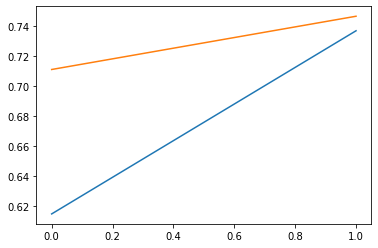

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, acc_val)
plt.figure()

In [6]:
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=128)
print(accuracy*100)

79/79 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.7465
74.6500015258789


In [7]:
model.save_weights("Fashion_LeNet5.hdf5", overwrite = True)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

rows = 1
cols = 10
fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

n = 10
test = X_test[:n]
pred = model.predict(test)

for i in range(n):
  image = (test[i] * 255).astype('uint8')
  image = cv2.resize(image, (96,96), interpolation = cv2.INTER_CUBIC)
  image = cv2.merge([image]*3)
  prediction = np.argmax(pred[i])
  if(prediction == y_test[i]):
    color = (0,255,0)
  else:
    color = (255,0,0)
  
  cv2.putText(image, classes[prediction], (0,10), cv2.FONT_HERSHEY_SIMPLEX, 0.5 ,color, 1)
  
  sp = plt.subplot(rows, cols, i+1, title = 'Pred = %s' %classes[y_test[i]] )
  sp.axis('Off')
  plt.imshow(image)

plt.show()

ImportError: libGL.so.1: cannot open shared object file: No such file or directory